In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Function to load a dataset from a file
def load_dataset():
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        try:
            df = pd.read_csv("/home/manasa/Desktop/DATA SCIENCE/ASSIGNMENT 3/Cutlets.csv")
            dataset_label.config(text=f"Loaded Dataset: {file_path}")
            return df
        except Exception as e:
            dataset_label.config(text="Error loading dataset.")
            print(e)


In [3]:
# Function to perform k-means clustering and display results
def cluster_data():
    try:
        k = int(k_entry.get())
        if k <= 0:
            result_label.config(text="Please enter a valid number of clusters (k > 0).")
            return

        data = load_dataset()
        if data is None:
            return

        X = data.values

        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        # Plot the clustered data
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
        plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, label='Centroids')
        plt.title(f'K-Means Clustering (k={k})')
        plt.xlabel('Rape')
        plt.ylabel('')
        plt.legend()
        plt.show()

        result_label.config(text=f"K-Means clustering complete (k={k}).")
    except Exception as e:
        result_label.config(text="Error performing clustering.")
        print(e)

In [4]:
# Create the main application window
app = tk.Tk()
app.title("K-Means Clustering")

''

In [5]:
# Create labels and widgets
dataset_label = ttk.Label(app, text="Load a CSV dataset:")
load_button = ttk.Button(app, text="Load Dataset", command=load_dataset)
k_label = ttk.Label(app, text="Number of Clusters (k):")
k_entry = ttk.Entry(app)
cluster_button = ttk.Button(app, text="Cluster Data", command=cluster_data)
result_label = ttk.Label(app, text="")

/home/manasa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


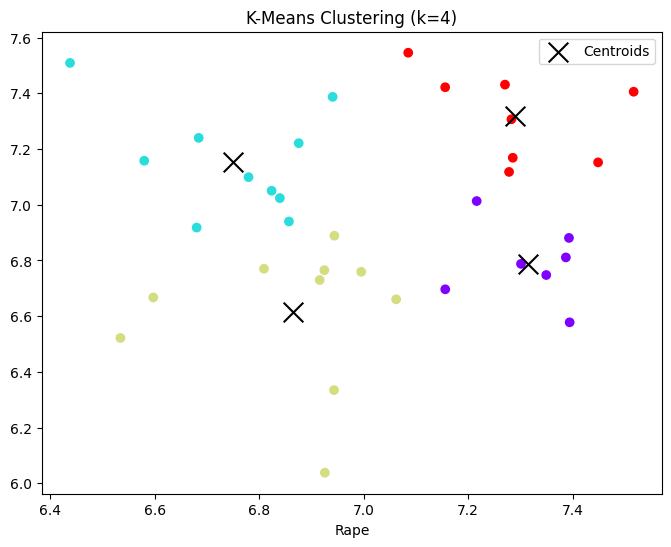

In [6]:
# Arrange widgets using grid layout
dataset_label.grid(row=0, column=0, columnspan=2)
load_button.grid(row=0, column=2)
k_label.grid(row=1, column=0)
k_entry.grid(row=1, column=1)
cluster_button.grid(row=1, column=2)
result_label.grid(row=2, column=0, columnspan=3)

# Start the application
app.mainloop()